## Table of Contents

* **[Data Loading](#1)**
* **[EDA](#2)**
* **[Train Test Split](#4)**
* **[Preprocessing](#5)**
* **[Feature Engineering](#6)**
* **[Model Training and Evaluation](#7)**
* **[Hyper-parameter tuning](#8)**
* **[Best Model selection](#9)**


## Importing all the necessary libraries

In [120]:

# Data Loading & Basic Manipulation
import pandas as pd 
import numpy as np

# Exploratory Data Analysis (EDA) & Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from wordcloud import WordCloud
import warnings


# Preprocessing & Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Feature Selection
from sklearn import feature_selection
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest ,chi2 , mutual_info_regression, f_regression,f_classif
from sklearn.feature_selection import RFE

# Model Training & Selection

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm 
from sklearn import tree
import lightgbm as lgb
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Train-Test Split & Cross-Validation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

# Model Evaluation & Metrics
from sklearn import metrics 

import warnings

<a id="1"> </a>
## Data Loading

In [121]:
#Loading the training dataset
df_train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

#Loading the testing dataset
df_test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

<a id="2"> </a>
## Explanatory Data Analysis

##### Information about the datatypes in the data


In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

### Insights

* **Size**: 20,000 records across 22 attributes.

* **Missing Data**: Certain columns (Cross Street, Modus Operandi, Weapon details) contain high number of  null values




In [123]:
#Shape of the data 

print("Train data shape:",df_train.shape)
print("Test data shape:",df_test.shape)

Train data shape: (20000, 22)
Test data shape: (5000, 21)


#### Head of train data

In [124]:
df_train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


#### Statistics of numerical columns

In [125]:
df_train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


#### Important Insights 


`Victim_Age`
* Average age of a victim is 30.14 with a standard deviation of 21.8
* Maximum age of a victim is 99 years
* A minimum age of -2 depicts some imparity in the data

#### Checking the percentage of null values in the dataset

In [126]:
df_train.isna().sum()/len(df_train)*100

Location                  0.000
Cross_Street             82.760
Latitude                  0.000
Longitude                 0.000
Date_Reported             0.000
Date_Occurred             0.000
Time_Occurred             0.000
Area_ID                   0.000
Area_Name                 0.000
Reporting_District_no     0.000
Part 1-2                  0.000
Modus_Operandi           13.705
Victim_Age                0.000
Victim_Sex               13.120
Victim_Descent           13.120
Premise_Code              0.000
Premise_Description       0.025
Weapon_Used_Code         63.325
Weapon_Description       63.325
Status                    0.000
Status_Description        0.000
Crime_Category            0.000
dtype: float64

#### Insights

* There are significantly high number of null values in `Cross Street` (82%)

* `Weapon Code` and `Weapon Description` also have high number of null values (around 63%) 


#### Distribution of the Crime Category(Dependent variable)

In [127]:
df_train['Crime_Category'].unique()

array(['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons'], dtype=object)

In [128]:
Value_count = df_train['Crime_Category'].value_counts()

print(Value_count/len(df_train)*100)

Crime_Category
Property Crimes                  58.330
Violent Crimes                   23.835
Crimes against Public Order       9.040
Fraud and White-Collar Crimes     6.775
Crimes against Persons            1.125
Other Crimes                      0.895
Name: count, dtype: float64


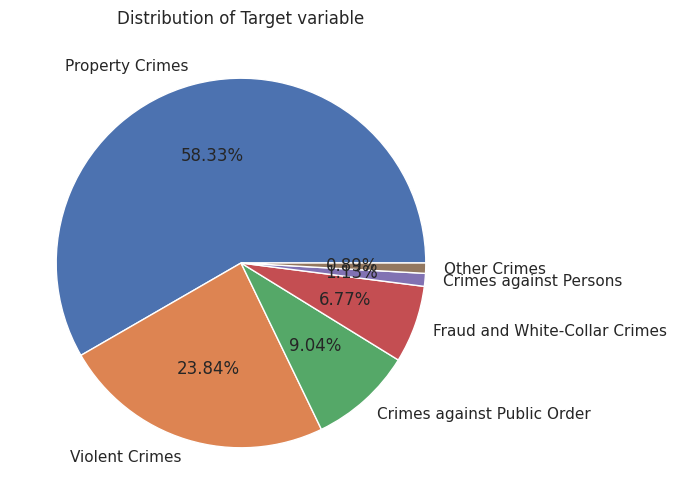

In [129]:
count = df_train['Crime_Category'].value_counts()

categories = count.index
values = count.values

plt.figure(figsize=(6, 6))
plt.pie(values, labels=categories, autopct='%1.2f%%')

plt.title('Distribution of Target variable')
plt.show()

  ### Key Observations

**Violent Offenses:**

 - Comprise 23.8% of the dataset.
 - Cover crimes like assault, robbery, and homicide.

**Property-Related Offenses:**
 - Constitute the largest share at 58.3% of all recorded crimes.
 - Includes activities such as theft, burglary, and vandalism.

**Public Order Offenses:**

- Make up 9.0% of reported incidents.
- Involves actions that disrupt public peace or order.

**Fraudulent and Financial Crimes:**

- Account for 6.8% of the dataset.
- Include scams, embezzlement, and financial fraud.
 
**Personal Offenses:**

- Represent 1.1% of the recorded crimes.
- Include crimes such as kidnapping and stalking.

**Miscellaneous Crimes:**

- Constitute 0.9% of the dataset.
- Include various other crime types.

#### Insights on Data Imbalance

- **High Imbalance in Crime Categories**: The dataset is highly imbalanced. Property Crimes dominate the dataset, accounting for 58.33% of the total cases. Violent Crimes are the second most frequent category, but they only make up 23.84% of the cases. This indicates a significant imbalance where some categories have a substantially higher number of instances compared to others.

- **Minor Categories**: Categories like Crimes against Persons (1.13%) and Other Crimes (0.90%) have very few instances compared to Property Crimes. 



#### Correlation plot

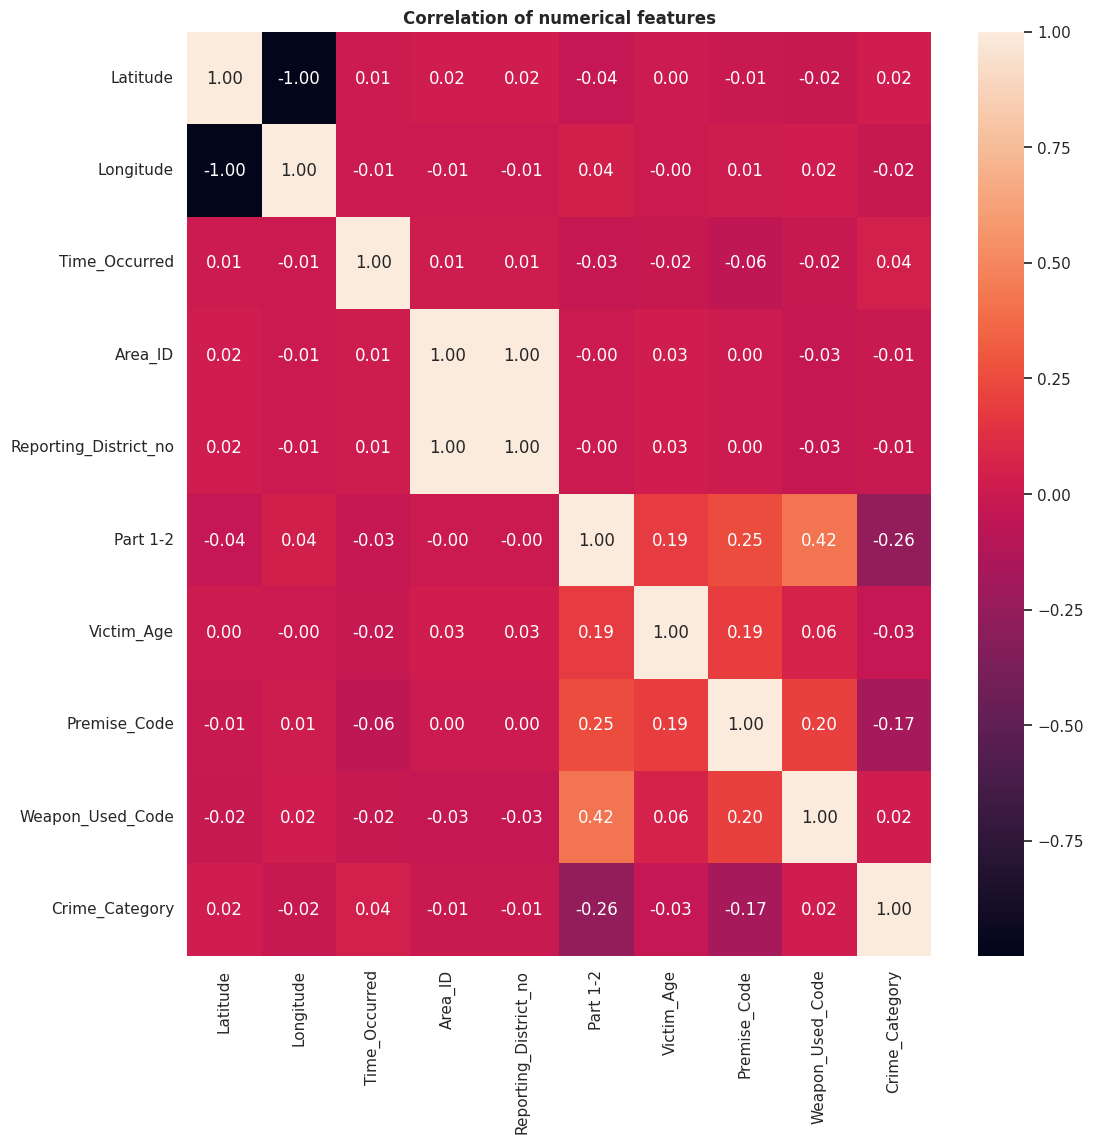

In [130]:
le = LabelEncoder()
df_train['Crime_Category'] = le.fit_transform(df_train['Crime_Category'])

cor_plt = df_train.corr(numeric_only=True)
cor_plt

plt.figure(figsize=(12, 12))
sns.heatmap(cor_plt, annot=True, fmt='.2f')
plt.title('Correlation of numerical features', fontsize=12, fontweight='bold')

plt.show()



### Correlation Analysis Insights



##### 1. Area_ID and Reporting_District_no
- Correlation: 1.00
- Insight: These two features are perfectly correlated, suggesting they might represent the same or similar information in different formats or levels of granularity.

##### 2. Part 1-2 and Crime_Category
- Correlation: -0.26
- Insight: There is a moderate negative correlation between Part 1-2 and Crime_Category, implying that as one of these features increases, the other tends to decrease to some extent.

##### 3. Part 1-2 and Weapon_Used_Code
- Correlation: 0.42
- Insight: These features have a moderate positive correlation, suggesting that crimes categorized under Part 1-2 are likely to involve a weapon more frequently.

##### 4. Part 1-2 and Premise_Code
- Correlation: 0.25
- Insight: There is a positive correlation between these features, indicating that certain types of premises are more associated with Part 1-2 crimes.

##### 5. Premise_Code and Weapon_Used_Code
- Correlation: 0.20
- Insight: There is a positive correlation between Premise_Code and Weapon_Used_Code, suggesting that certain premises are more likely to involve crimes where weapons are used.

##### 6. Victim_Age and Premise_Code
- Correlation: 0.19
- Insight: There is a positive correlation between Victim_Age and Premise_Code, indicating that the age of victims might be associated with specific types of premises.

##### 7. Moderate Positive/Negative Correlations: 
- Part 1-2 with Crime_Category (-0.26), Part 1-2 with Weapon_Used_Code (0.42), and Part 1-2 with 



----------------------------------------------------------------------------------------

### Univariate Descriptive Analysis

#### 1. Latitude and Longitude

In [131]:
df_train[['Longitude','Latitude']]

,Longitude,Latitude
0,-118.3910,34.1522
1,-118.2391,34.0028
2,-118.2653,34.0111
3,-118.4590,34.2953
4,-118.2918,33.9787
...,...,...
19995,-118.3523,34.0334
19996,-118.5011,34.2212
19997,-118.3815,34.0571
19998,-118.2835,33.7451


In [132]:
df_train['Location']

0         4500    CARPENTER                    AV
1                 45TH                         ST
2          600 E  MARTIN LUTHER KING JR        BL
3        14900    ORO GRANDE                   ST
4         7100 S  VERMONT                      AV
                           ...                   
19995     5100 W  ADAMS                        BL
19996    16900    ROSCOE                       BL
19997     1000 S  SHENANDOAH                   ST
19998      300 W  SEPULVEDA                    ST
19999             DALTON                       AV
Name: Location, Length: 20000, dtype: object

In [133]:
df_train[['Longitude','Latitude']].describe()

,Longitude,Latitude
count,20000.000000,20000.000000
mean,-117.893072,33.940704
std,7.377726,2.126810
min,-118.663400,0.000000
25%,-118.429700,34.009200
50%,-118.323000,34.058700
75%,-118.274400,34.165025
max,0.000000,34.328100


In [134]:
df_train[(df_train['Latitude'] == 0) & (df_train['Longitude'] == 0)].shape

(78, 22)

#### Insights

* There is a  presence of 0.00 in both Longitude and Latitude for 78 rows. 

* Geographically, a 0 latitude and 0 longitude corresponds to a point in the Atlantic Ocean off the coast of Africa, a location that is unlikely to be relevant. They could represent cases where location data was not available or improperly recorded.

#### Replacing the (0,0) with mean values of latitude and longitude


In [135]:

mean_latitude = df_train[df_train['Latitude'] != 0]['Latitude'].mean()
mean_longitude = df_train[df_train['Longitude'] != 0]['Longitude'].mean()

df_train.loc[(df_train['Latitude'] == 0) & (df_train['Longitude'] == 0), 'Latitude'] = mean_latitude
df_train.loc[(df_train['Latitude'] == 0) & (df_train['Longitude'] == 0), 'Longitude'] = mean_longitude

----------------------------------------------------------------------------------------

#### 2. Cross Street

In [136]:
#Checking for null values of cross street

df_train['Cross_Street'].isna().sum()/len(df_train)

0.8276

#### Insights

* As there are high number of null values , there is no use of doing univariate analysis of this column . This column has to be dropped


---------------------------------------------------------------------------------------

#### 3. Date_Reported , Date_Occurred and Time Occurred
       

In [137]:
df_train[['Date_Reported','Date_Occurred']]

,Date_Reported,Date_Occurred
0,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM
1,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM
2,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM
3,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM
4,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM
...,...,...
19995,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM
19996,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM
19997,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM
19998,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM


### Key observation

* From the output it is visible that the Date_Reported and Date_Occurred includes time which is inappropriate as it is same for all rows

#### Converting Date reported and Date occurred into datetime format and then extracting the year, month and day separately

In [138]:
for df in [df_train, df_test]:
    for col in ['Date_Reported', 'Date_Occurred']:
        df[col] = pd.to_datetime(df[col])
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day

warnings.filterwarnings("ignore")


In [139]:
#Now dropping the date reported and date occurred columns as they are no longer required

df_train.drop(columns=['Date_Reported','Date_Occurred'],inplace=True)
df_test.drop(columns=['Date_Reported','Date_Occurred'],inplace=True)

#### Time_Occurred

In [140]:
df_train['Time_Occurred']


0        1800.0
1        1345.0
2         605.0
3        1800.0
4        1130.0
          ...  
19995     700.0
19996     259.0
19997    1400.0
19998     600.0
19999    1800.0
Name: Time_Occurred, Length: 20000, dtype: float64

In [141]:
df_train['Time_Occurred'].nunique()

996

#### Insights

* The time occurred is of the form (hour hour : second second)
* There are a total of 996 different values of time occurred

##### Converting it to only hours so that there can be a maximum of 24 distinct values 


In [142]:

df_train['Hour_Occurred'] = df_train['Time_Occurred'] // 100
df_test['Hour_Occurred'] = df_test['Time_Occurred'] // 100

df_train['Hour_Occurred'].nunique()

24

#### Key Point

* Now the time occurred is in hours and has only 24 distinct values 

<Axes: xlabel='Date_Reported_month', ylabel='count'>

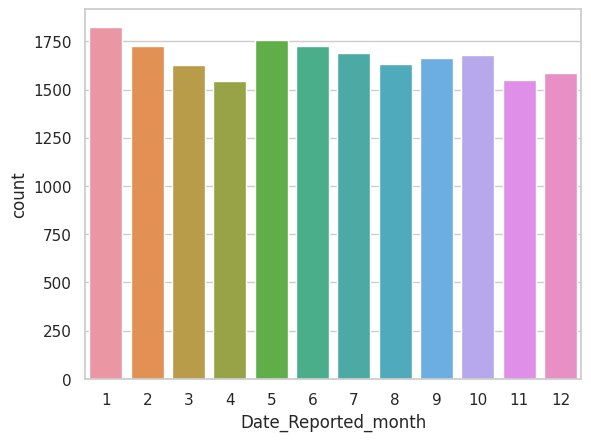

In [143]:
sns.countplot(data=df_train,x='Date_Reported_month')

<Axes: xlabel='Date_Reported_year', ylabel='count'>

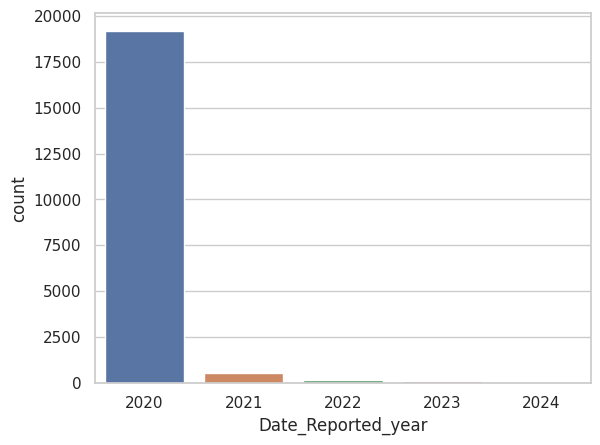

In [144]:
sns.countplot(data=df_train,x='Date_Reported_year')

### Insights



#### Date_Reported_year Distribution
* **2020**: Dominates with 95.88% of the reports.
* **Insight**: Majority of reports are from 2020, with a sharp decline in subsequent years.

#### Date_Reported_month Distribution
*  Reports are fairly consistent throughout the year with peaks in January and May.

#### Date_Reported_day Distribution
* **28th Day**: Most frequent reporting day at 3.61%.
*  Reports are distributed fairly evenly across days, with a slight peak on the 28th.

#### Date_Occurred_year Distribution
* **2020**: All occurrences are reported to have happened in 2020.
.

#### Date_Occurred_month Distribution
* **January and May**: Highest occurrences at 9.18% and 8.78%.
* **November**: Lowest occurrence at 7.77%.
* **Insight**: Occurrences are fairly consistent across months, similar to reported months.

#### Date_Occurred_day Distribution
* **1st Day**: Most common occurrence day at 4.68%.
* **Other Significant Days**: 20th, 28th, and 4th also have higher frequencies.
* **Insight**: High number of occurrences on the 1st day of the month, with other days showing even distribution.

#### Hour_Occurred Distribution
* **12 PM**: Peak occurrence time at 7.32%.
* **Insight**: Incidents are more likely to occur around midday and evening, with fewer incidents in the early morning.


#### Correlation plot with all the new date columns



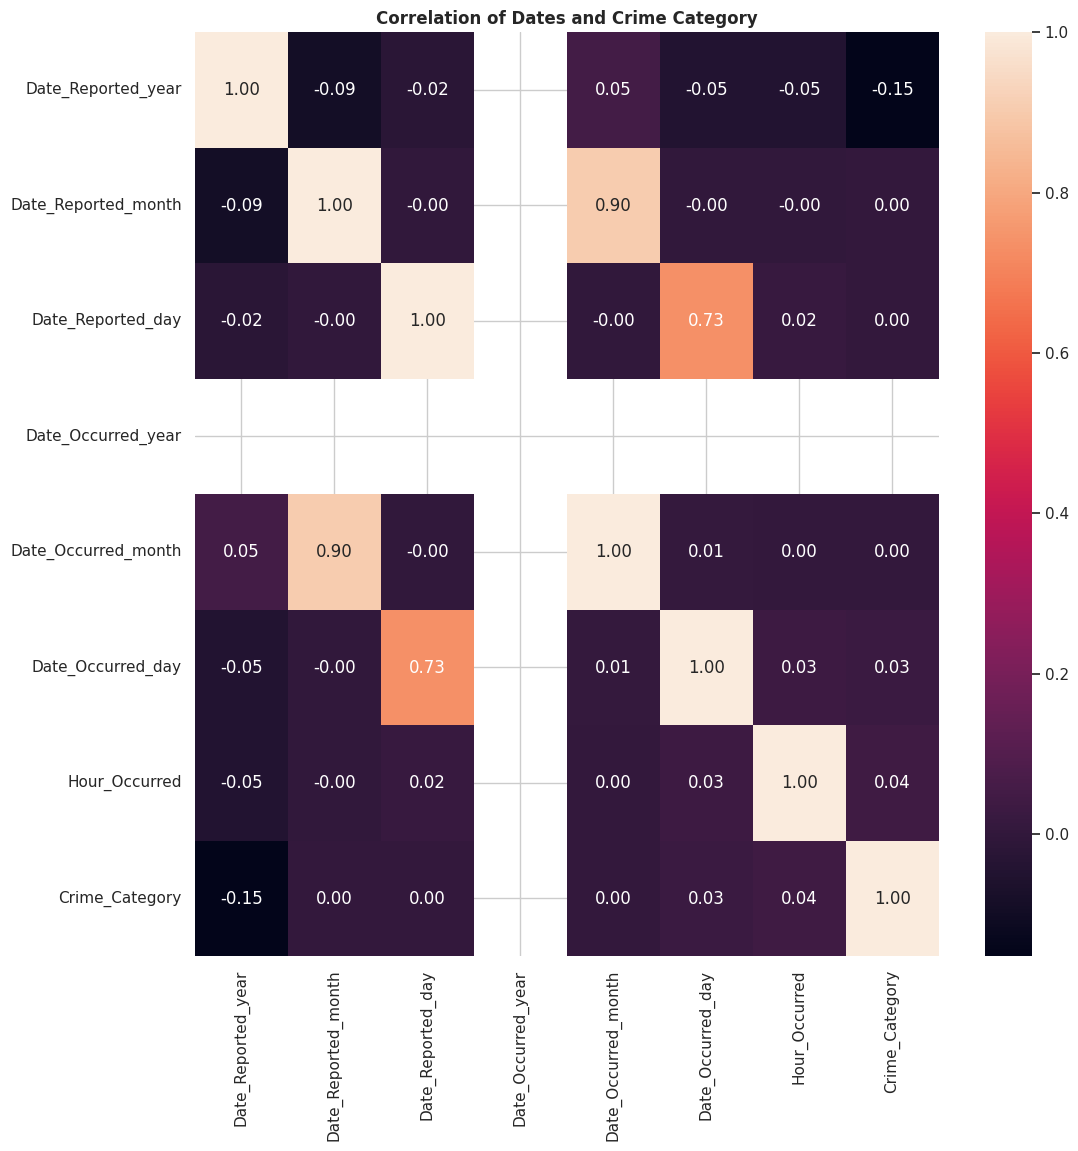

In [145]:


cor_plt = df_train[['Date_Reported_year', 'Date_Reported_month', 'Date_Reported_day', 
                   'Date_Occurred_year', 'Date_Occurred_month', 'Date_Occurred_day', 
                    'Hour_Occurred','Crime_Category']].corr()
cor_plt

plt.figure(figsize=(12, 12))
sns.heatmap(cor_plt, annot=True, fmt='.2f')
plt.title('Correlation of Dates and Crime Category', fontsize=12, fontweight='bold')

plt.show()



### Insights

* Only Date Reported Year has some correlation with the Crime Category.
* The remaining date columns have no correlation with the Crime Category and hence can be dropped

----------------------------------------------------------------------------------------

####  6. Area Name and Area Id

In [146]:
df_train['Area_Name'].unique()

array(['N Hollywood', 'Newton', 'Mission', '77th Street', 'Northeast',
       'Hollenbeck', 'Pacific', 'Van Nuys', 'Devonshire', 'Wilshire',
       'Hollywood', 'Harbor', 'Topanga', 'Central', 'West Valley',
       'Olympic', 'Foothill', 'West LA', 'Southeast', 'Southwest',
       'Rampart'], dtype=object)

In [147]:
df_train['Area_Name'].nunique()

21

In [148]:
df_train['Area_ID'].nunique()

21

In [149]:
#Distribution of Area Names 

df_train['Area_Name'].value_counts()/len(df_train)*100

Area_Name
77th Street    6.725
Pacific        5.785
Central        5.780
Southwest      5.650
Southeast      5.335
N Hollywood    5.325
Hollywood      5.070
Newton         4.995
Olympic        4.800
Wilshire       4.715
Rampart        4.655
West LA        4.550
Van Nuys       4.510
Harbor         4.360
Mission        4.350
Northeast      4.195
Topanga        3.960
West Valley    3.950
Devonshire     3.845
Hollenbeck     3.775
Foothill       3.670
Name: count, dtype: float64

#### Crime Distribution Across Areas
#### Key Observations:

 
 `77th Street` stands out with the highest concentration of reported crimes (6.73%).
    
 This distribution suggests that no single area dominates, although there is a slight concentration of activity in the top areas.

In [150]:
df_train[df_train['Area_Name']== 'Newton']['Area_ID']

1        13.0
2        13.0
25       13.0
41       13.0
53       13.0
         ... 
19923    13.0
19928    13.0
19941    13.0
19972    13.0
19978    13.0
Name: Area_ID, Length: 999, dtype: float64

In [151]:
df_train[df_train['Area_Name']== '77th Street']['Area_ID']

4        12.0
11       12.0
27       12.0
79       12.0
100      12.0
         ... 
19930    12.0
19947    12.0
19954    12.0
19979    12.0
19983    12.0
Name: Area_ID, Length: 1345, dtype: float64

### Insights

* Area Id and Area Name depict the same location in two different data-types
* We can drop any one of these variables
* Area Id can be used as it is already in float datatype and Area Name can be dropped

----------------------------------------------------------------------------------------

-----------------------------------------------------------------------------

#### Reporting District Number

In [152]:
df_train['Reporting_District_no']

0        1563.0
1        1367.0
2        1343.0
3        1924.0
4        1245.0
          ...  
19995     303.0
19996    1008.0
19997     849.0
19998     558.0
19999     397.0
Name: Reporting_District_no, Length: 20000, dtype: float64

In [153]:
df_train['Reporting_District_no'].nunique()

1120

### Insights

Reporting District Number has high number of distinct values (1120) and low correlation with the target variable(- 0.01). It has to be vectorized or can be dropped

----------------------------------------------------------------------------------------

####  Part 1-2

In [154]:
df_train['Part 1-2'].value_counts()/len(df_train)*100

Part 1-2
1.0    58.185
2.0    41.815
Name: count, dtype: float64

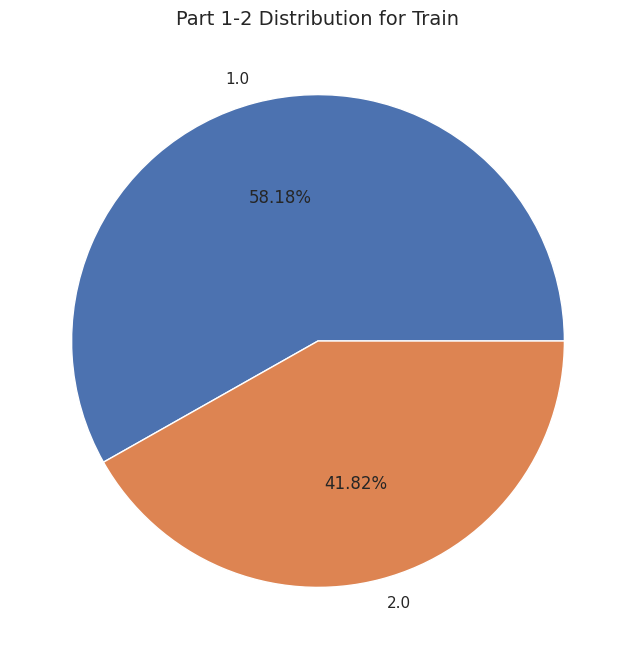

In [155]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
colors = sns.color_palette('pastel')

df_train['Part 1-2'].value_counts().plot(kind='pie', autopct='%1.2f%%')

plt.title('Part 1-2 Distribution for Train', fontsize=14)
plt.ylabel('')  
plt.show()

#### Key Observations

- **Category 1.0**: This category constitutes the majority of the dataset, with a percentage of **58.2%**.
- **Category 2.0**: This category accounts for **41.8%** of the dataset, making it a significant portion but still smaller compared to Category 1.0.

#### Implications
- The dataset is relatively balanced, but with a slight skew towards Category 1.0.



____________________________________________________________________________

####  Victim Sex 

In [156]:
df_train['Victim_Sex'].value_counts()/len(df_train)*100

Victim_Sex
M    42.69
F    35.88
X     8.30
H     0.01
Name: count, dtype: float64

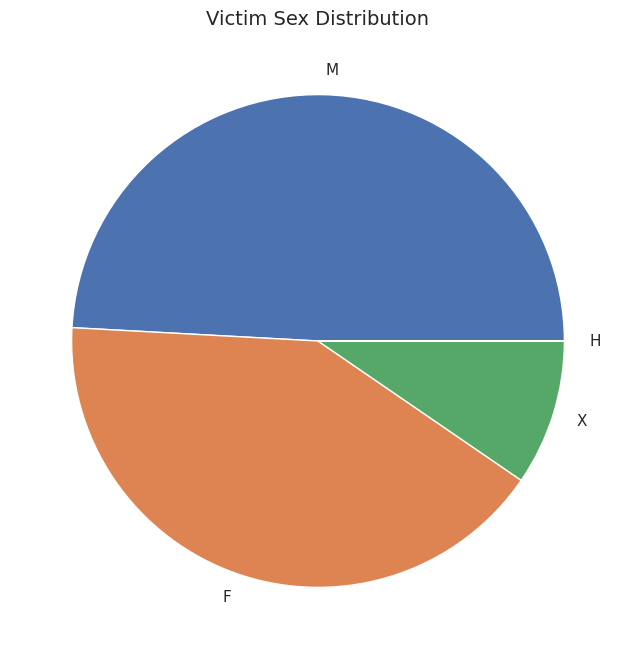

In [157]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
colors = sns.color_palette('pastel')

df_train['Victim_Sex'].value_counts().plot(kind='pie')

plt.title('Victim Sex Distribution', fontsize=14)
plt.ylabel('')  
plt.show()

### Key Observations
- **M (Male)**: This group constitutes the largest portion of victims, accounting for approximately **42%** of the total.
- **F (Female)**: The second-largest group, females make up around **35%** of the victims.
- **X**: This group represents a smaller percentage, around **10%**, indicating a much lower incidence or reporting rate.
- **H**: The smallest category, accounting for a negligible percentage, which may indicate a lack of data or the use of non-standard categories.

#### Implications
- The data shows a relatively even distribution between male and female victims, though males slightly outnumber females.


#### Victim Descent

In [158]:
df_train['Victim_Descent'].nunique()

17

In [159]:
df_train['Victim_Descent'].value_counts()/len(df_train)*100

Victim_Descent
H    30.715
W    21.225
B    14.405
X     9.245
O     8.015
A     2.135
K     0.415
C     0.255
F     0.240
J     0.080
I     0.055
V     0.040
P     0.020
Z     0.015
U     0.010
D     0.005
G     0.005
Name: count, dtype: float64

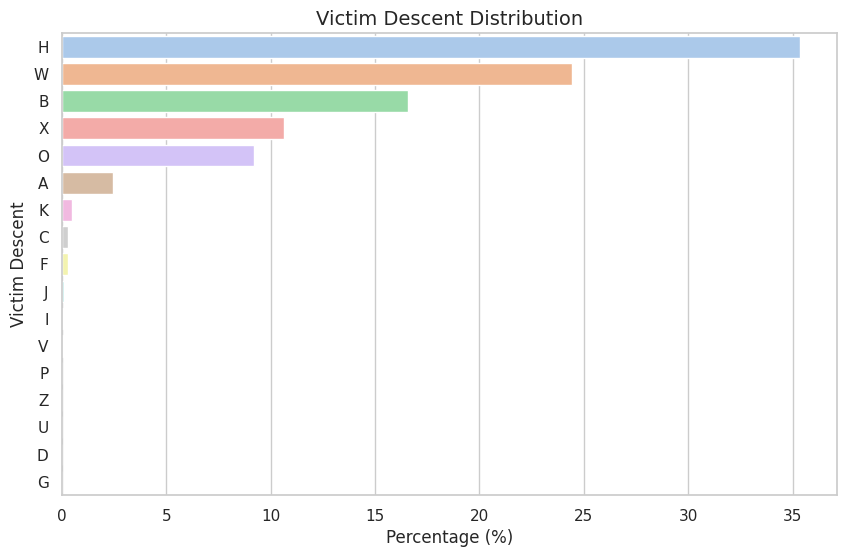

In [160]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


sns.barplot(
    x=df_train['Victim_Descent'].value_counts(normalize=True).values * 100, 
    y=df_train['Victim_Descent'].value_counts().index, 
    palette='pastel'
)

plt.title('Victim Descent Distribution', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Victim Descent')
plt.show()

-----------------------------------------------------------------------------

#### Premise_Code,Premise_Description

In [161]:
df_train['Premise_Description'].head()

0                    STREET
1                 SWAP MEET
2    SINGLE FAMILY DWELLING
3                    STREET
4                 MINI-MART
Name: Premise_Description, dtype: object

In [162]:
df_train[df_train['Premise_Description']== 'STREET']['Premise_Code']

0        101.0
3        101.0
12       101.0
15       101.0
21       101.0
         ...  
19987    101.0
19988    101.0
19989    101.0
19990    101.0
19999    101.0
Name: Premise_Code, Length: 5033, dtype: float64

### Insights

* Premise Code  and Premise Description depict the same information in two different data-types
* We can drop any one of these variables


----------------------------------------------------------------------------------------

In [163]:
df_train.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Time_Occurred',
       'Area_ID', 'Area_Name', 'Reporting_District_no', 'Part 1-2',
       'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent',
       'Premise_Code', 'Premise_Description', 'Weapon_Used_Code',
       'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category',
       'Date_Reported_year', 'Date_Reported_month', 'Date_Reported_day',
       'Date_Occurred_year', 'Date_Occurred_month', 'Date_Occurred_day',
       'Hour_Occurred'],
      dtype='object')

#### Weapon_Used_Code and Weapon_Description

In [164]:
df_train['Weapon_Used_Code'].nunique()

57

In [165]:
df_train['Weapon_Description'].nunique()

57

In [166]:
df_train[df_train['Weapon_Used_Code']==114]['Weapon_Description']

165      AIR PISTOL/REVOLVER/RIFLE/BB GUN
650      AIR PISTOL/REVOLVER/RIFLE/BB GUN
1029     AIR PISTOL/REVOLVER/RIFLE/BB GUN
1099     AIR PISTOL/REVOLVER/RIFLE/BB GUN
2206     AIR PISTOL/REVOLVER/RIFLE/BB GUN
2520     AIR PISTOL/REVOLVER/RIFLE/BB GUN
2728     AIR PISTOL/REVOLVER/RIFLE/BB GUN
3474     AIR PISTOL/REVOLVER/RIFLE/BB GUN
3569     AIR PISTOL/REVOLVER/RIFLE/BB GUN
3659     AIR PISTOL/REVOLVER/RIFLE/BB GUN
3819     AIR PISTOL/REVOLVER/RIFLE/BB GUN
4237     AIR PISTOL/REVOLVER/RIFLE/BB GUN
4288     AIR PISTOL/REVOLVER/RIFLE/BB GUN
4743     AIR PISTOL/REVOLVER/RIFLE/BB GUN
5347     AIR PISTOL/REVOLVER/RIFLE/BB GUN
6012     AIR PISTOL/REVOLVER/RIFLE/BB GUN
6049     AIR PISTOL/REVOLVER/RIFLE/BB GUN
8412     AIR PISTOL/REVOLVER/RIFLE/BB GUN
9072     AIR PISTOL/REVOLVER/RIFLE/BB GUN
9105     AIR PISTOL/REVOLVER/RIFLE/BB GUN
10126    AIR PISTOL/REVOLVER/RIFLE/BB GUN
10464    AIR PISTOL/REVOLVER/RIFLE/BB GUN
10972    AIR PISTOL/REVOLVER/RIFLE/BB GUN
12246    AIR PISTOL/REVOLVER/RIFLE

In [167]:
df_train[['Weapon_Used_Code','Weapon_Description']].isna().sum()

Weapon_Used_Code      12665
Weapon_Description    12665
dtype: int64

#### Insights

* Here also , Weapon Code  and Weapon Description depict the same information in two different data-types
* But both of them have high number of null values 
* They have to dropped 

----------------------------------------------------------------------------------------

####  Status and Status_Description

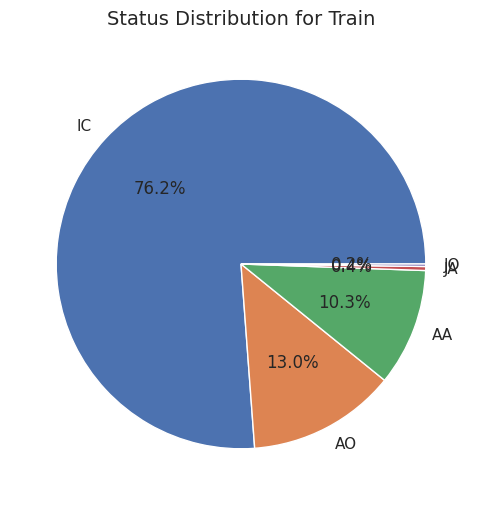

In [168]:
plt.figure(figsize=(8, 6)) 

df_train['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Status Distribution for Train', fontsize=14)
plt.ylabel('') 
plt.show()

#### Key Observations

- **IC (Investigation Continuing) Dominance**: The overwhelming majority of cases (76.2%) fall under the "IC" status. This suggests that a large portion of crimes in the dataset are either under investigation or their outcome is currently inconclusive.

- **Minimal Representation**: "JA  (Juvenile Arrest)" and "JO (Juvenile Offender)" represent a very small fraction of the cases (0.4% and 0.2% respectively). 


In [169]:
df_train[df_train['Status']=='AO']['Status']

5        AO
10       AO
17       AO
25       AO
26       AO
         ..
19972    AO
19977    AO
19981    AO
19983    AO
19985    AO
Name: Status, Length: 2597, dtype: object

#### Insights

* Here as well, Status  and status Description depict the same information in two different data-types
* Either of them can be used as both are of same data-type

----------------------------------------------------------------------------

### Multivariate Analysis

In [170]:
df_train['Crime_Category'] = le.inverse_transform(df_train['Crime_Category'])


- **Status description vs CrimeCategory**

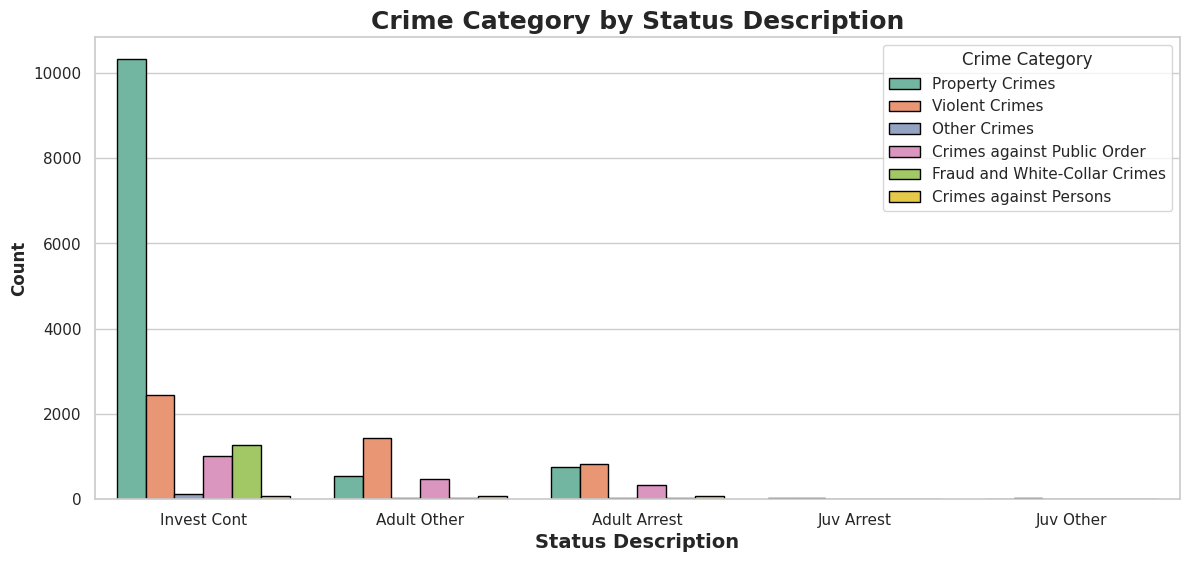

In [171]:
plt.figure(figsize=(14,6))

sns.countplot(data=df_train, x="Status_Description", hue="Crime_Category", palette="Set2", edgecolor="black")

plt.title("Crime Category by Status Description", fontsize=18, weight="bold")

plt.xlabel("Status Description", fontsize=14, weight="bold")
plt.ylabel("Count", fontsize=12, weight="bold")

plt.legend(title="Crime Category", loc="upper right", frameon=True)

plt.show()

-----------------------------------------------------------------------------

 
* **Victim Gender vs Crime Categories**

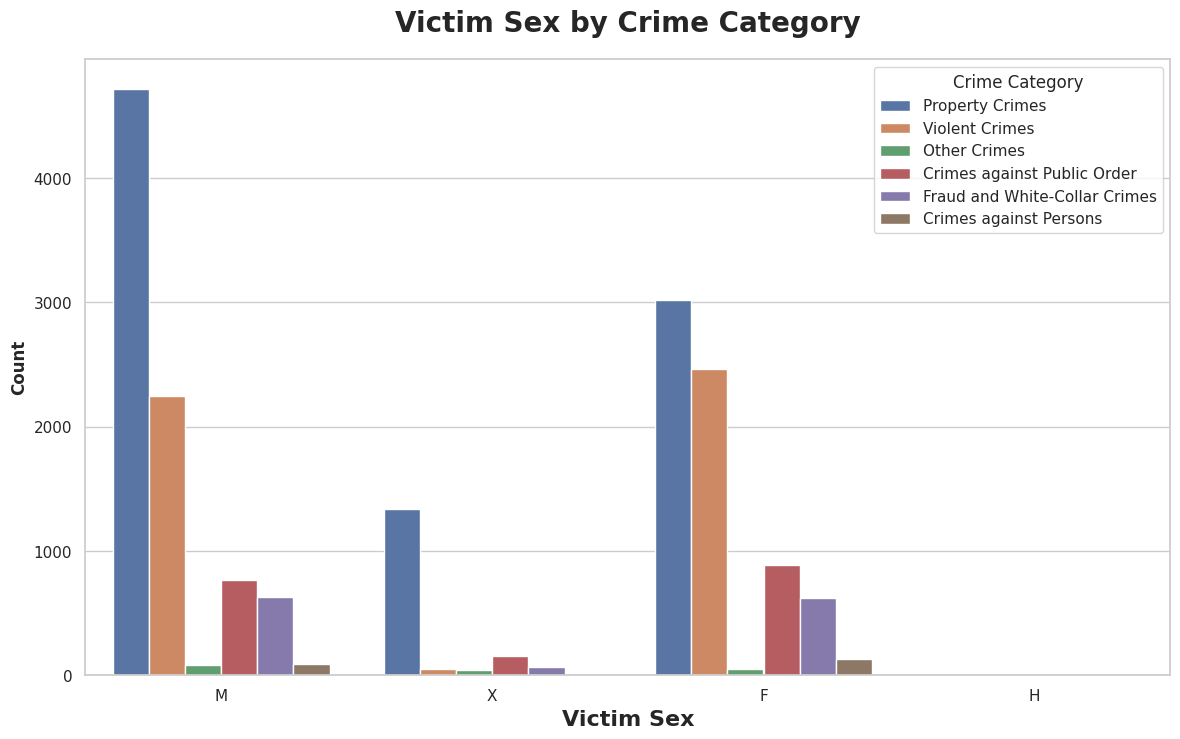

In [172]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_train, x="Victim_Sex", hue="Crime_Category")
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Victim Sex", weight="bold", fontsize=16)
plt.title("Victim Sex by Crime Category", weight="bold", fontsize=20, pad=20)
plt.legend(title="Crime Category", fancybox=True)
plt.show()


#### Key Observations

- **Male Victims Predominate**: The chart indicates that the majority of victims across all crime categories are Male. This is especially evident in "Violent Crimes" and "Property Crimes," where male victims significantly outnumber other genders.
- **Property Crimes are  Most Frequent**: Across all victim genders, "Property Crimes" are the most common type of crime in the dataset.
- **Gender Disparity in Violent Crimes**: While males experience a higher count of violent crimes, the proportion of "Violent Crimes" is relatively higher for female victims  compared to their overall victimization rate.
- **Other Categories**: "Crimes against Public Order" and "Fraud and White-Collar Crimes" exhibit a less pronounced gender disparity, showing a relatively balanced distribution across victim genders.

### Implications

- **Gender-Specific Vulnerability**: The data suggests that males may be more vulnerable to property and violent crimes. 




--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [173]:
df_train.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Time_Occurred',
       'Area_ID', 'Area_Name', 'Reporting_District_no', 'Part 1-2',
       'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent',
       'Premise_Code', 'Premise_Description', 'Weapon_Used_Code',
       'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category',
       'Date_Reported_year', 'Date_Reported_month', 'Date_Reported_day',
       'Date_Occurred_year', 'Date_Occurred_month', 'Date_Occurred_day',
       'Hour_Occurred'],
      dtype='object')

#### Removing Columns based on Exploratory Data Analysis (EDA)

In [174]:
columns_to_drop = ['Cross_Street', 'Area_Name','Reporting_District_no','Premise_Code', 'Weapon_Description','Weapon_Used_Code', 'Status_Description','Latitude',"Longitude",'Date_Reported_month', 'Date_Reported_day', 'Date_Occurred_year',
       'Date_Occurred_month', 'Date_Occurred_day', 'Hour_Occurred','Time_Occurred']

df_test.drop(columns=columns_to_drop, inplace=True)
df_train.drop(columns=columns_to_drop, inplace=True)

#### Assigning X and Y

In [175]:
X,y = df_train.drop(columns=['Crime_Category']),df_train['Crime_Category']

## Imputation

In [179]:
num_imputer = SimpleImputer(strategy='mean')
X['Victim_Age'] = num_imputer.fit_transform(X[['Victim_Age']])
df_test['Victim_Age'] = num_imputer.transform(df_test[['Victim_Age']])

# Impute other columns with most frequent value
other_imputer = SimpleImputer(strategy='most_frequent')

# Get the columns to impute (excluding 'Victim_Age')
cols_to_impute = X.columns.difference(['Victim_Age'])

# Fit and transform on the selected columns, then assign back to those columns
X[cols_to_impute] = other_imputer.fit_transform(X[cols_to_impute])
df_test[cols_to_impute] = other_imputer.transform(df_test[cols_to_impute])

<a id="4"> </a>
## Splitting the Dataset


In [180]:
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=18)


<a id="5"> </a>
# Preprocessing

In [181]:
categorical_cols = ['Area_ID','Part 1-2','Victim_Sex','Victim_Descent','Status','Date_Reported_year']
numerical_cols = ['Victim_Age']
text_cols = ['Location','Premise_Description','Modus_Operandi']


#### Preprocessing 

In [182]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('loc', TfidfVectorizer(), 'Location'),
        ('mo', TfidfVectorizer(), 'Modus_Operandi'),
        ('pd', TfidfVectorizer(), 'Premise_Description')
    ]
)

In [183]:
X_train_prep = preprocessor.fit_transform(x_train, y_train)
X_val_prep = preprocessor.transform(x_val)

<a id="6"> </a>
# Feature Engineering

#### Select K-Best

In [ ]:
#  def scores_kbest(k_values,model):
#     scores = {}
#     for i in k_values:
        
#         k_best_pipeline = Pipeline([
#             ('prep', preprocessor),
#             ('k_best', SelectKBest(f_classif, k=i)),
#             ('model_lgbm', model)
#         ])

#         k_best_pipeline.fit(x_train, y_train_encoded)

#         score = k_best_pipeline.score(x_val,y_val_encoded)
#         scores[i] = score
#     return scores

In [ ]:
# kbest_scores = scores_kbest([450,500,550,600,650,700,750],LGBMClassifier())

# print(kbest_scores)

#### Scores for k-best(LGBM): 
* {450: 0.94925, 500: 0.949,550: 0.951, 600: 0.95, 650: 0.95, 700: 0.95, 750: 0.94875}

* Best number of features = 550

In [ ]:
# kbest_scores_xgb = scores_kbest([450,500,550,600,650,700,750,800,850,900],XGBClassifier())

# print(kbest_scores_xgb)

#### Scores for k-best(XGBoost): 
* {450: 0.94975, 500: 0.951, 550: 0.95075, 600: 0.95025, 650: 0.95025, 700: 0.95025, 750: 0.95225, 800: 0.95175, 850: 0.95075, 900: 0.951}

* Best number of features = 750

----------------------------------------------------------------------------------------

##### Final Chosen features = 750 as it gives the highest accuracy of 95.2 using XGBoost

##### Final preprocessing using pipeline

In [184]:
final_preprocess = Pipeline([('prep',preprocessor),('k_best',SelectKBest(f_classif, k=750))])
X_train_f =  final_preprocess.fit_transform(x_train,y_train)
X_val_f = final_preprocess.transform(x_val)

<a id="7"> </a>
# Training Models

In [185]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

### 1. Decision Tree Classifier

##### Training and evaluating Decision Tree

In [186]:
decision_tree = DecisionTreeClassifier()


decision_tree.fit(X_train_f,y_train_encoded)
decision_tree.score(X_val_f,y_val_encoded)

0.92475

##### Confusion Matrix

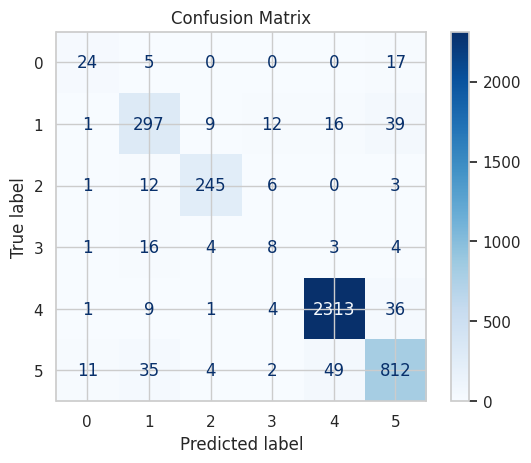

In [187]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = decision_tree.predict(X_val_f)


cm = confusion_matrix(y_val_encoded, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

##### Classification Report

In [188]:
from sklearn.metrics import classification_report


report = classification_report(y_val_encoded, y_pred, target_names=le.classes_)
print(report)

                               precision    recall  f1-score   support

       Crimes against Persons       0.62      0.52      0.56        46
  Crimes against Public Order       0.79      0.79      0.79       374
Fraud and White-Collar Crimes       0.93      0.92      0.92       267
                 Other Crimes       0.25      0.22      0.24        36
              Property Crimes       0.97      0.98      0.97      2364
               Violent Crimes       0.89      0.89      0.89       913

                     accuracy                           0.92      4000
                    macro avg       0.74      0.72      0.73      4000
                 weighted avg       0.92      0.92      0.92      4000



#### Insights from the Decision Tree Model

* **Overall Accuracy**: High at **93%**.
* **Property Crimes**: Excellent performance with **98%** F1-score.


______________________________________________________________________________________

## 2.Random Forest

##### Training and evaluating Random Forest

In [189]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_f,y_train_encoded)
rand_forest.score(X_val_f,y_val_encoded)

0.94075

##### Confusion Matrix

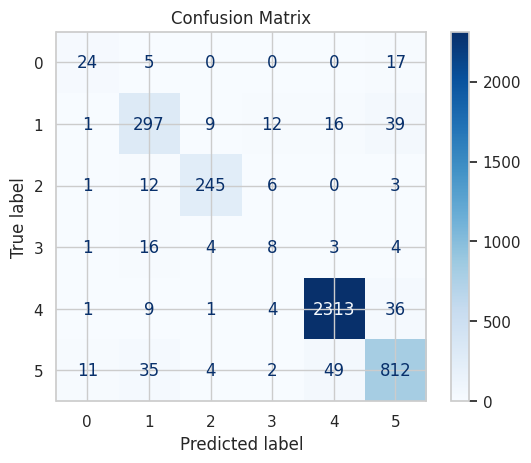

In [190]:
y_pred_rf = rand_forest.predict(X_val_f)


cm = confusion_matrix(y_val_encoded, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rand_forest.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

##### Classification Report

In [191]:
rand_forest_report = classification_report(y_val_encoded, y_pred_rf, target_names=le.classes_)
print(rand_forest_report)

warnings.filterwarnings("ignore")


                               precision    recall  f1-score   support

       Crimes against Persons       0.94      0.37      0.53        46
  Crimes against Public Order       0.84      0.78      0.81       374
Fraud and White-Collar Crimes       0.93      0.93      0.93       267
                 Other Crimes       1.00      0.08      0.15        36
              Property Crimes       0.98      0.99      0.99      2364
               Violent Crimes       0.87      0.96      0.91       913

                     accuracy                           0.94      4000
                    macro avg       0.93      0.68      0.72      4000
                 weighted avg       0.94      0.94      0.94      4000



#### Insights from the Random Forest Model

* **Overall Accuracy**:**94%**.
* **Property Crimes**: Good performance with **99%** F1-score.
* **Crimes against Persons**: Low, F1-score **51%**.
* **Other Crimes**: Very Weak with **20%** F1-score.

-----------------------------------------------------------------------------------------------------------------

## 3. XG Boost

##### Training and evaluating XG Boost

In [192]:
xgb = XGBClassifier()
xgb.fit(X_train_f,y_train_encoded)
xgb.score(X_val_f,y_val_encoded)

0.94825

##### Confusion Matrix

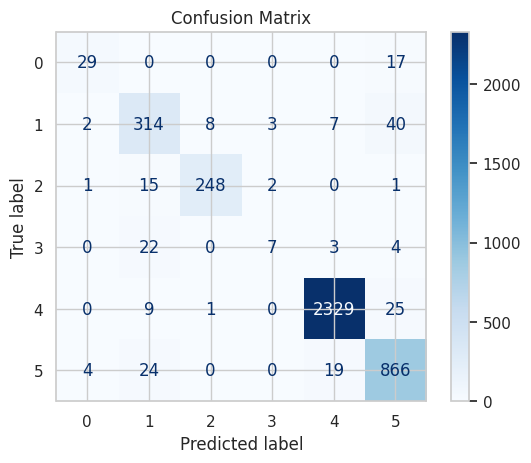

In [193]:
y_pred_xg= xgb.predict(X_val_f)


cm = confusion_matrix(y_val_encoded, y_pred_xg)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rand_forest.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

##### Classification Report

In [194]:
xgb_report = classification_report(y_val_encoded, y_pred_xg, target_names=le.classes_)
print(xgb_report)

                               precision    recall  f1-score   support

       Crimes against Persons       0.81      0.63      0.71        46
  Crimes against Public Order       0.82      0.84      0.83       374
Fraud and White-Collar Crimes       0.96      0.93      0.95       267
                 Other Crimes       0.58      0.19      0.29        36
              Property Crimes       0.99      0.99      0.99      2364
               Violent Crimes       0.91      0.95      0.93       913

                     accuracy                           0.95      4000
                    macro avg       0.84      0.75      0.78      4000
                 weighted avg       0.95      0.95      0.95      4000



#### Insights from the XGBClassifier

* Overall Accuracy:**95%**.
* Property Crimes: Good performance with **99%** F1-score.
* Other Crimes:  Weak with **33%** F1-score.

* **Best model so far**

----------------------------------------------------------------------------------------------------------------

#### Model Selection 

In [195]:

y_pred_prob_dt = decision_tree.predict_proba(X_val_f)
fpr_dt, tpr_dt, _ = roc_curve(y_val_encoded, y_pred_prob_dt[:, 1], pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)


y_pred_prob_rf = rand_forest.predict_proba(X_val_f)
fpr_rf, tpr_rf, _ = roc_curve(y_val_encoded, y_pred_prob_rf[:, 1], pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

y_pred_prob_xgb = xgb.predict_proba(X_val_f)
fpr_xgb, tpr_xgb, _ = roc_curve(y_val_encoded, y_pred_prob_xgb[:, 1], pos_label=1) 
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


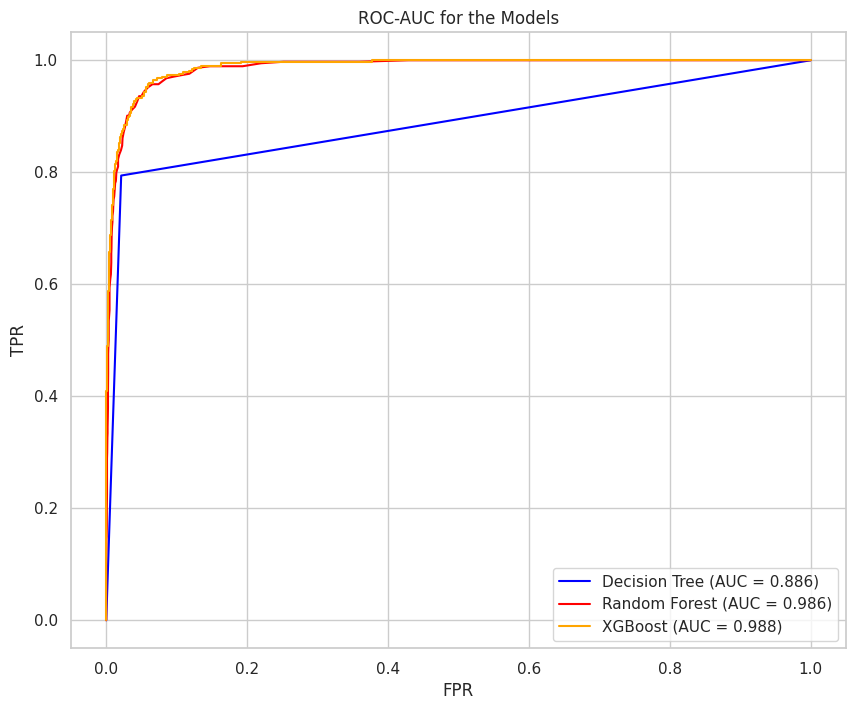

In [196]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', color='red')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})', color='orange')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC for the Models')
plt.legend(loc='lower right')
plt.show()


#### Final Model

From the ROC-AUC curve and accuracy score, the best model coming out is XGBoost

<a id="8"> </a>
## Hyper-parameter tuning 

#### HPT for Random Forest

In [ ]:
# rand_forest = {
#     'n_estimators':[150,250,300],
#     'max_features':['auto', 'log2', 0.7],
#     'max_depth':[7,10,12],
    
# }
# grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=rand_forest,cv=3,verbose=3,n_jobs=-1)
# grid_rf.fit(X_train_f,y_train_encoded)

In [ ]:
# grid_rf.best_params_

#### Results

{'max_depth': 12, 'max_features': 0.7, 'n_estimators': 150}


#### HPT for XGB Boost

In [ ]:
# xgb_grid = {
#     'learning_rate':[0.01,0.1],
#     'max_depth':[3,5,7],
#     'n_estimators':[200,300,500]
# }
# grid_xgb = GridSearchCV(XGBClassifier(),param_grid=xgb_grid,cv=4,verbose=3,n_jobs=-1)
# grid_xgb.fit(X_train_f,y_train_encoded)

In [ ]:
# grid_xgb.best_params_

#### Best paramters after HPT for XGB Classifier
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500} with a score of 95.35

<a id="9"> </a>
# Final Model

### Chosen model : XGB Classifier

In [197]:
le_final = LabelEncoder()
y_encoded = le_final.fit_transform(y)

In [198]:
X_train_final = final_preprocess.fit_transform(X, y_encoded)
X_test_final = final_preprocess.transform(df_test)

#### XGBoost model with hyperparameters

In [ ]:
# xgb_model = XGBClassifier(learning_rate=0.1, max_depth=5,n_estimators=500)
# xgb_model.fit(X_train_final, y_encoded)

In [ ]:
# y_pred_encoded = xgb_model.predict(X_test_final)
# y_pred = le_final.inverse_transform(y_pred_encoded)

## Creating the submission file for our baseline model

In [ ]:
# submission = pd.DataFrame(columns = ["ID","Crime_Category"])
# submission["ID"] = [i for i in range(1,len(y_pred)+1)]
# submission["Crime_Category"] = y_pred
# submission.to_csv('submission.csv',index=False)
